# HW4

## 0. Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from dython.nominal import associations
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
beans = pd.read_csv("soybean-large_data.csv")
beans

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
303,herbicide-injury,1,1,?,0,?,1,0,?,?,...,?,?,3,?,?,?,?,?,?,1
304,herbicide-injury,0,1,?,0,?,0,3,?,?,...,?,?,3,?,?,?,?,?,?,1
305,herbicide-injury,1,1,?,0,?,0,0,?,?,...,?,?,3,?,?,?,?,?,?,1


## 1. Эксплораторный анализ

In [3]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             307 non-null    object
 1   date             307 non-null    object
 2   plant-stand      307 non-null    object
 3   precip           307 non-null    object
 4   temp             307 non-null    object
 5   hail             307 non-null    object
 6   crop-hist        307 non-null    object
 7   area-damaged     307 non-null    object
 8   severity         307 non-null    object
 9   seed-tmt         307 non-null    object
 10  germination      307 non-null    object
 11  plant-growth     307 non-null    object
 12  leaves           307 non-null    int64 
 13  leafspots-halo   307 non-null    object
 14  leafspots-marg   307 non-null    object
 15  leafspot-size    307 non-null    object
 16  leaf-shread      307 non-null    object
 17  leaf-malf        307 non-null    ob

In [4]:
# pd.set_option('display.max_columns', 38)
beans.describe(include=['object', 'int64'])

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
count,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307
unique,19,8,3,4,4,3,5,5,4,4,...,4,3,5,5,3,3,3,3,3,4
top,alternarialeaf-spot,5,0,2,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
freq,40,65,160,210,179,211,99,101,151,140,...,266,286,193,164,227,247,244,251,256,260
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for c in beans.columns:
    print("---- %s ---" % c)
    print(beans[c].value_counts())

---- name ---
alternarialeaf-spot            40
brown-spot                     40
frog-eye-leaf-spot             40
phytophthora-rot               40
brown-stem-rot                 20
anthracnose                    20
purple-seed-stain              10
powdery-mildew                 10
phyllosticta-leaf-spot         10
rhizoctonia-root-rot           10
diaporthe-stem-canker          10
downy-mildew                   10
bacterial-pustule              10
bacterial-blight               10
charcoal-rot                   10
diaporthe-pod-&-stem-blight     6
cyst-nematode                   6
herbicide-injury                4
2-4-d-injury                    1
Name: name, dtype: int64
---- date ---
5    65
4    58
3    53
2    41
6    41
1    36
0    12
?     1
Name: date, dtype: int64
---- plant-stand ---
0    160
1    139
?      8
Name: plant-stand, dtype: int64
---- precip ---
2    210
1     47
0     39
?     11
Name: precip, dtype: int64
---- temp ---
1    179
2     80
0     41
?      7
Nam

Увидим довольно много знаков "?". Заменим их на NaN.

In [6]:
beans.replace("?", np.nan, inplace=True)
beans

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,herbicide-injury,1,1,NaN,0,NaN,1,0,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,1
304,herbicide-injury,0,1,NaN,0,NaN,0,3,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,1
305,herbicide-injury,1,1,NaN,0,NaN,0,0,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
beans.isna().sum()

name                0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

Пропущенных данных не так много. УДАЛИМ ЖЕ ИХ!!

In [8]:
beans_omitna = beans.dropna()

Нарисуем корреляционную матрицу Крамера:

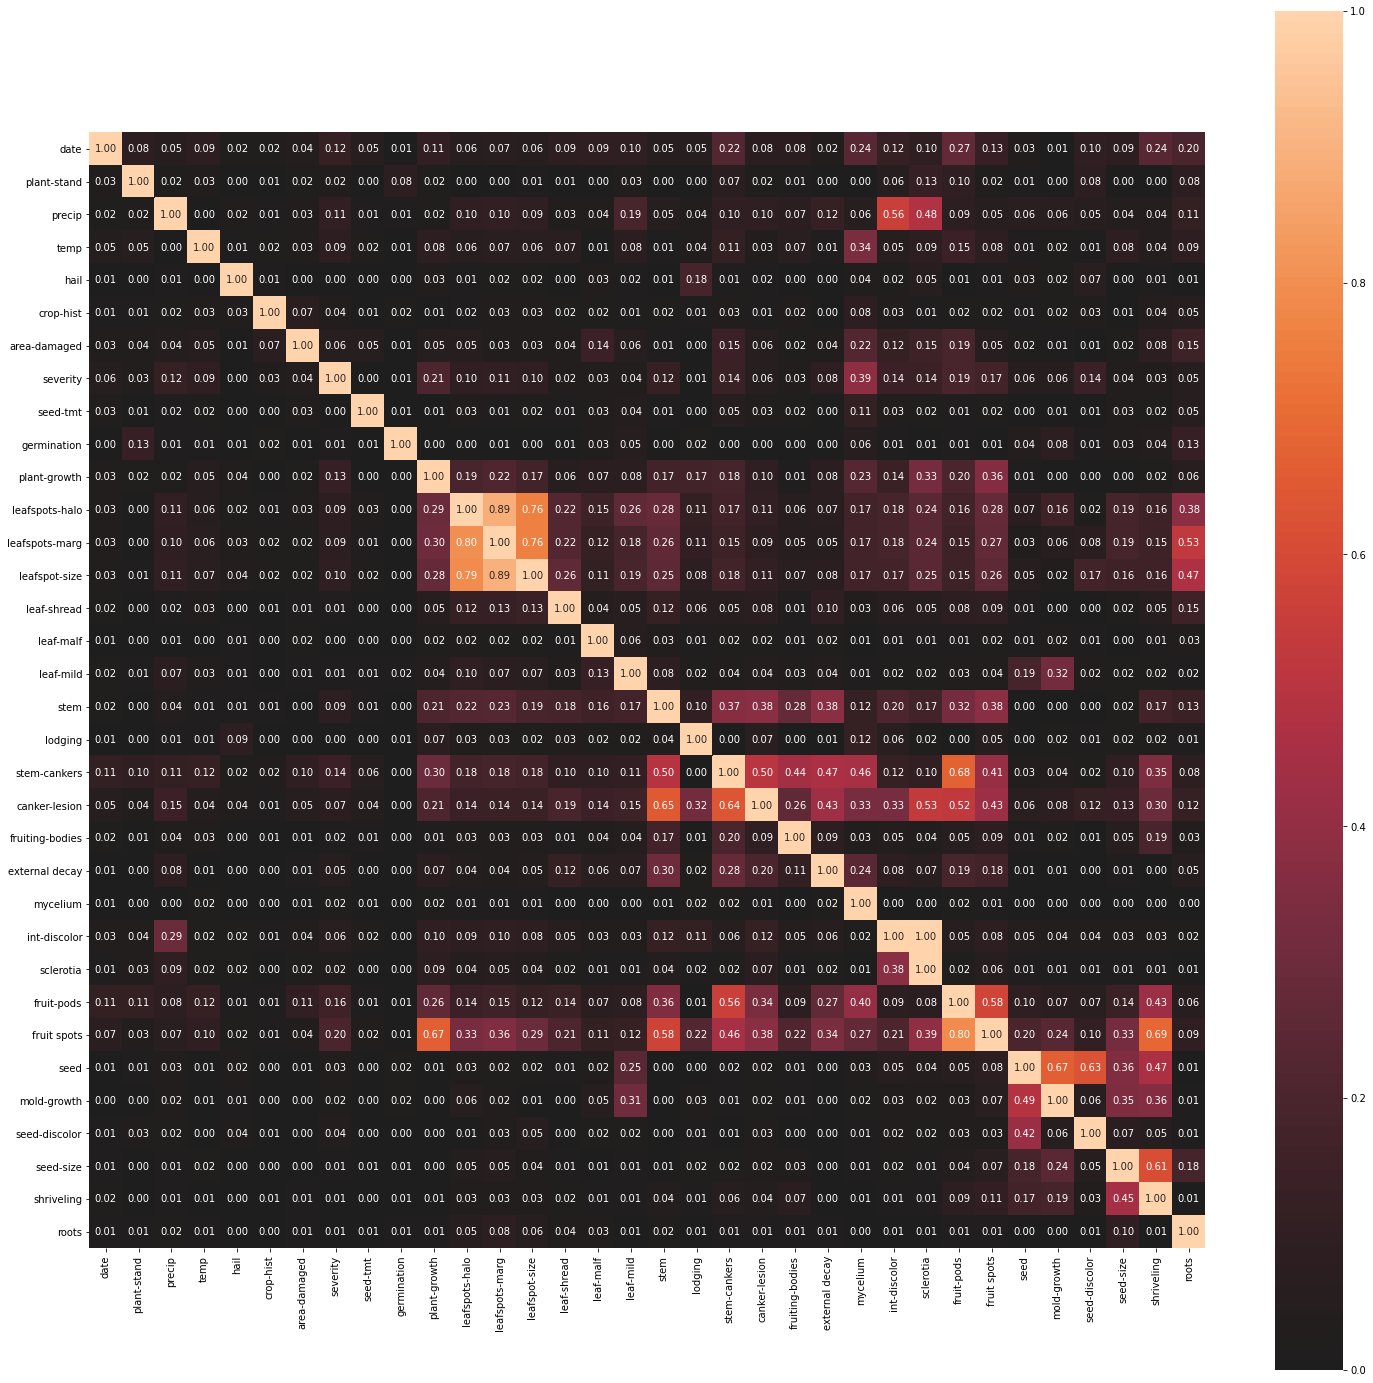

{'corr':                      date  plant-stand    precip      temp      hail  \
 date             1.000000     0.079507  0.053148  0.092103  0.022211   
 plant-stand      0.029137     1.000000  0.016824  0.034988  0.004961   
 precip           0.023384     0.020199  1.000000  0.003639  0.023809   
 temp             0.045284     0.046940  0.004066  1.000000  0.007962   
 hail             0.006117     0.003728  0.014904  0.004460  1.000000   
 crop-hist        0.014774     0.011384  0.022984  0.028462  0.025122   
 area-damaged     0.032327     0.038174  0.044622  0.050066  0.005013   
 severity         0.061655     0.032145  0.122145  0.094229  0.003159   
 seed-tmt         0.025894     0.005876  0.015030  0.016162  0.003134   
 germination      0.004451     0.128919  0.013356  0.008432  0.006072   
 plant-growth     0.033876     0.017969  0.015642  0.052082  0.036771   
 leafspots-halo   0.028824     0.004743  0.108971  0.056569  0.016801   
 leafspots-marg   0.028529     0.004806  0.

In [9]:
associations(beans_omitna.drop(["leaves","name"],axis=1), theil_u=True, figsize=(25, 25))


Удалим особенно сильно коррелирующие между собой переменные и names: 

In [10]:
beans_omitna = beans_omitna.drop(["int-discolor","sclerotia","fruit spots","fruit-pods", "leafspots-marg",
                                 "leafspots-halo", "leafspot-size","name"],axis=1)

## 2 Разделите ваш датасет на тестовую и тренировочную выборки в таком отношении, чтобы все классы были представлены в обоих выборках и были стратифицированны. 
## И сюда же - 4. В случае тестовой выборки удалите информацию о принадлежности к классам

In [11]:
X = beans_omitna.drop(["plant-stand"],axis=1)
y = beans_omitna["plant-stand"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)

## 3 Обучите классификатор

In [12]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

## 5 Предскажите значения классов используя ваш классификатор

In [13]:
predicted = rf.predict(x_test)
predicted

array(['0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0',
       '0', '1'], dtype=object)

# 6 Оцените качество вашего классификатора используя известные вам метрики (F-мера и матрица неточностей). Какие выводы вы можете сделать

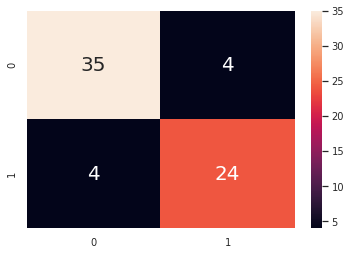

In [14]:
ar = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(ar, range(2), range(2))
sn.set(font_scale=0.9) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}) # font size

In [15]:
f1_score(y_test, predicted, average='weighted')

0.8805970149253731

Такое себе. Могло бы быть и лучше. Чистка датасета и удаление скоррелированных переменных позволили даже достичь определенных результатов. Но нет предела совершенству. Попробуем ещё пооптимизировать.

# 7. Выведите топ 3 признаков, которые оказались самыми важными при классификации

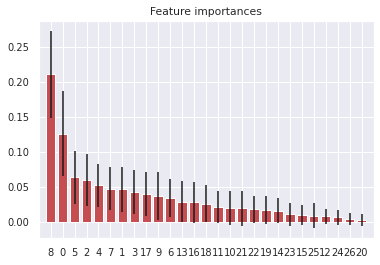

In [16]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [17]:
print("Feature ranking:")

for f in range(3):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 8 (0.210433)
2. feature 0 (0.125718)
3. feature 5 (0.063508)


Отберём десять наиболее прилично влияющих фичей.

In [18]:
x_train_withbest = x_train.iloc[: ,[8,0,2,5,4,9,7,3,6,16]]
x_test_withbest = x_test.iloc[: ,[8,0,2,5,4,9,7,3,6,16]]

## 8 С помощью GridSearch оптимизируйте ваш классификатор и сравните его с полученным изначально

In [19]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
             }
search = GridSearchCV(rf, parameters, n_jobs=4) 
# from sklearn import preprocessing
# X = preprocessing.scale(X) 
search.fit(x_train_withbest, y_train)
# search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [20]:
best_tree = search.best_estimator_

In [21]:
predicted = best_tree.predict(x_test_withbest)
predicted

array(['0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0',
       '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1'], dtype=object)

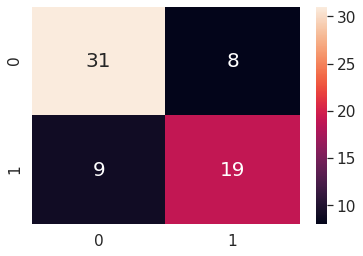

In [22]:
ar = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(ar, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}) # font size

In [23]:
f1_score(y_test, predicted, average='weighted')

0.7455679027188569

ХММММММММ.Почему-то метрики ухудшились, несмотря на вроде бы оптимизацию. Надо потом уточнить, почему. Мне это не очень ясно.